# DFS Search Algorithm

### Import the Graph Library and Other Utilities

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(parent_dir)

from assignment_1.lib.graph import Graph
from assignment_1.lib.load_romanian_cities import load_romania
from assignment_1.lib.matplotlib_utils import stack_plot, graph_visualizer
from assignment_1.lib.experiment_utils import experiment, city_benchmark

<h3>Algorithm Implementation</h3>

In [2]:
def dfs(graph: Graph, start: str, goal: str) -> list[str]:
    visited = set()
    stack = [(start, [start])]
    while stack:
        (node, path) = stack.pop()
        if node not in visited:
            visited.add(node)
            if node == goal:
                return path
            for neighbor in graph[node][1]:
                stack.append((neighbor, path + [neighbor]))

#### A, B, C. The benchmark should be finding the path between each node. Randomly pick 10 cities. Find the path between them.

In [3]:

average_time, average_path_length = city_benchmark(dfs)

#### D. Create random graphs with a number of nodes n = 10, 20, 30, 40. Randomly connect nodes with the probability of edges p = 0.2, 0.4, 0.6, 0.8. In total, you will have 16 graphs.

In [4]:
experiment_graphs, results = experiment(dfs, [10, 20, 30, 40], [0.2, 0.4, 0.6, 0.8])

##### (Optional) Code for graph visualizer, to visualize the generated graphs with their edges

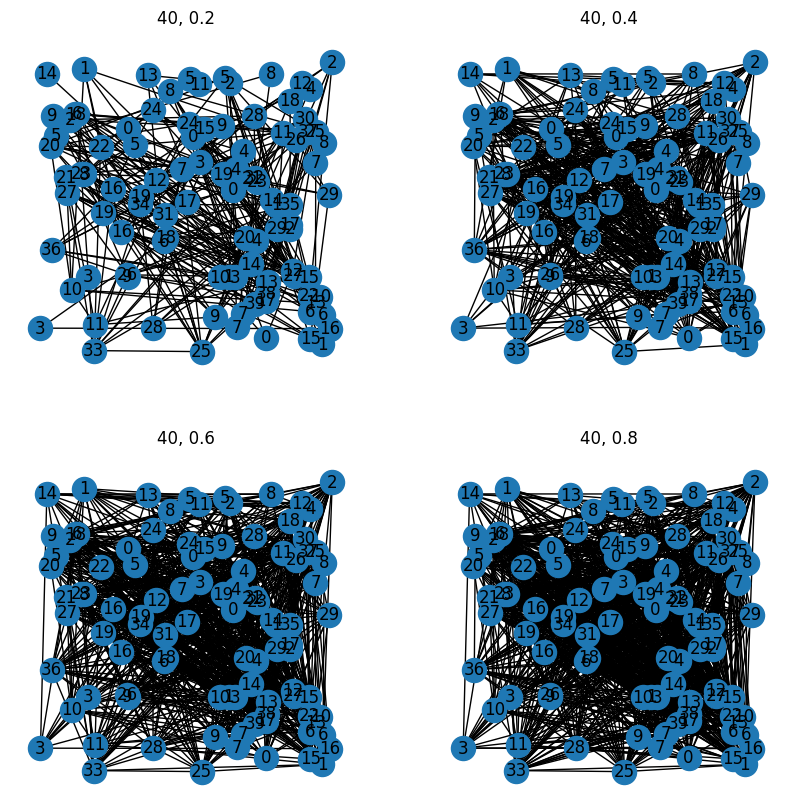

In [6]:
graph_visualizer(experiment_graphs)

## Plot the graphs using matplotlib.pyplot

#### A. Plot the time taken

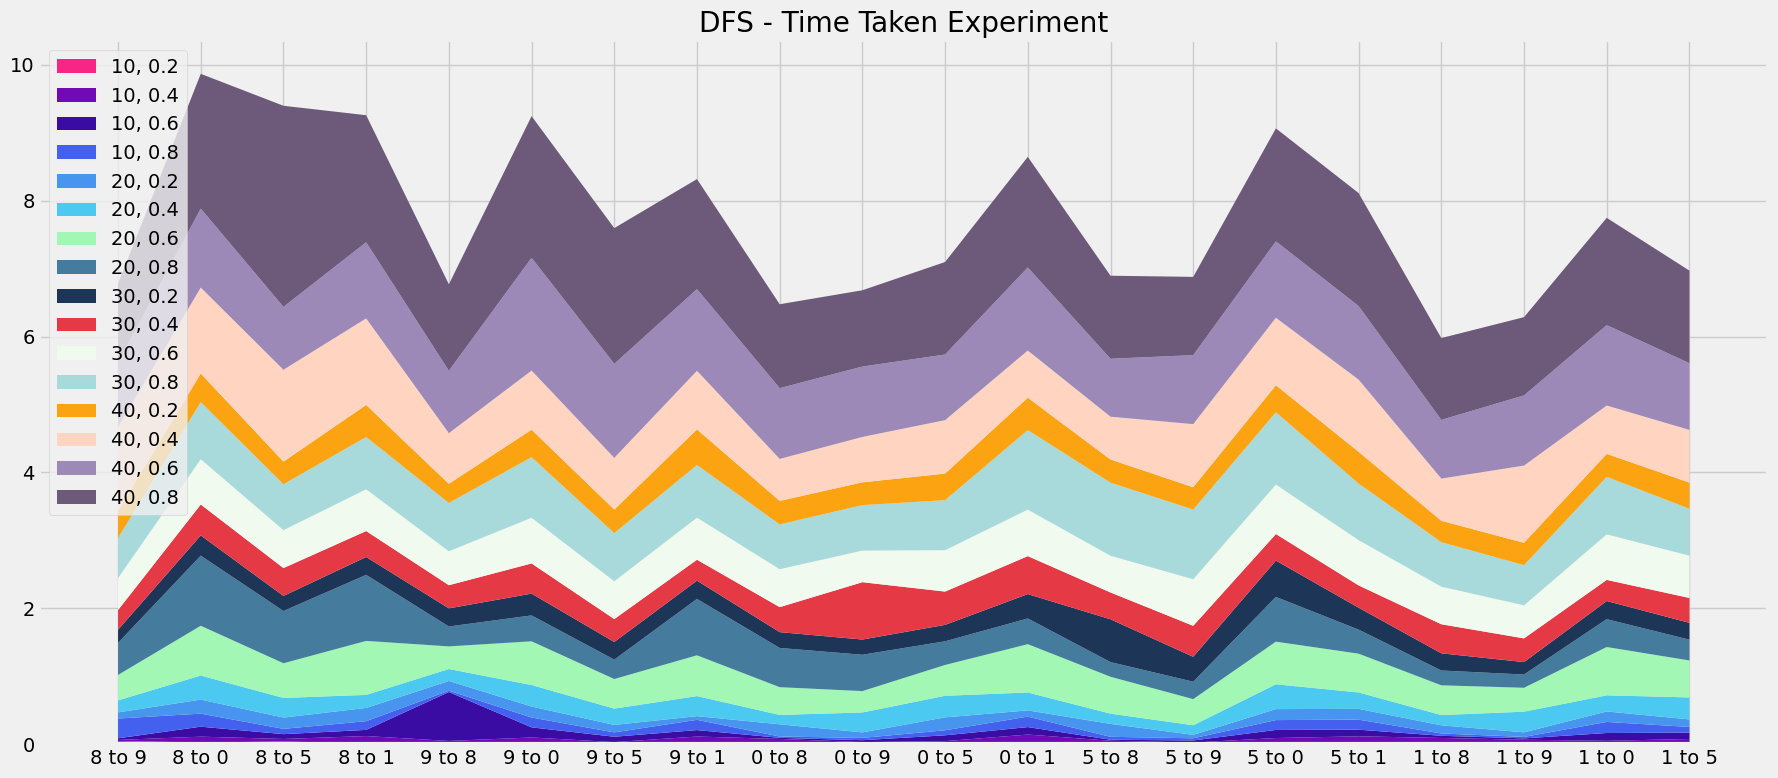

In [10]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plt.style.use('fivethirtyeight')

nodes = list(results['10, 0.2'].keys())
labels = []
time_taken = []

for i, (label, result) in enumerate(results.items()):
    labels.append(label)
    time_taken.append(list(round(time, 3) for time, path in result.values()))

stack_plot("DFS - Time Taken Experiment", nodes, time_taken, labels)

#### B. Plot the solution path length

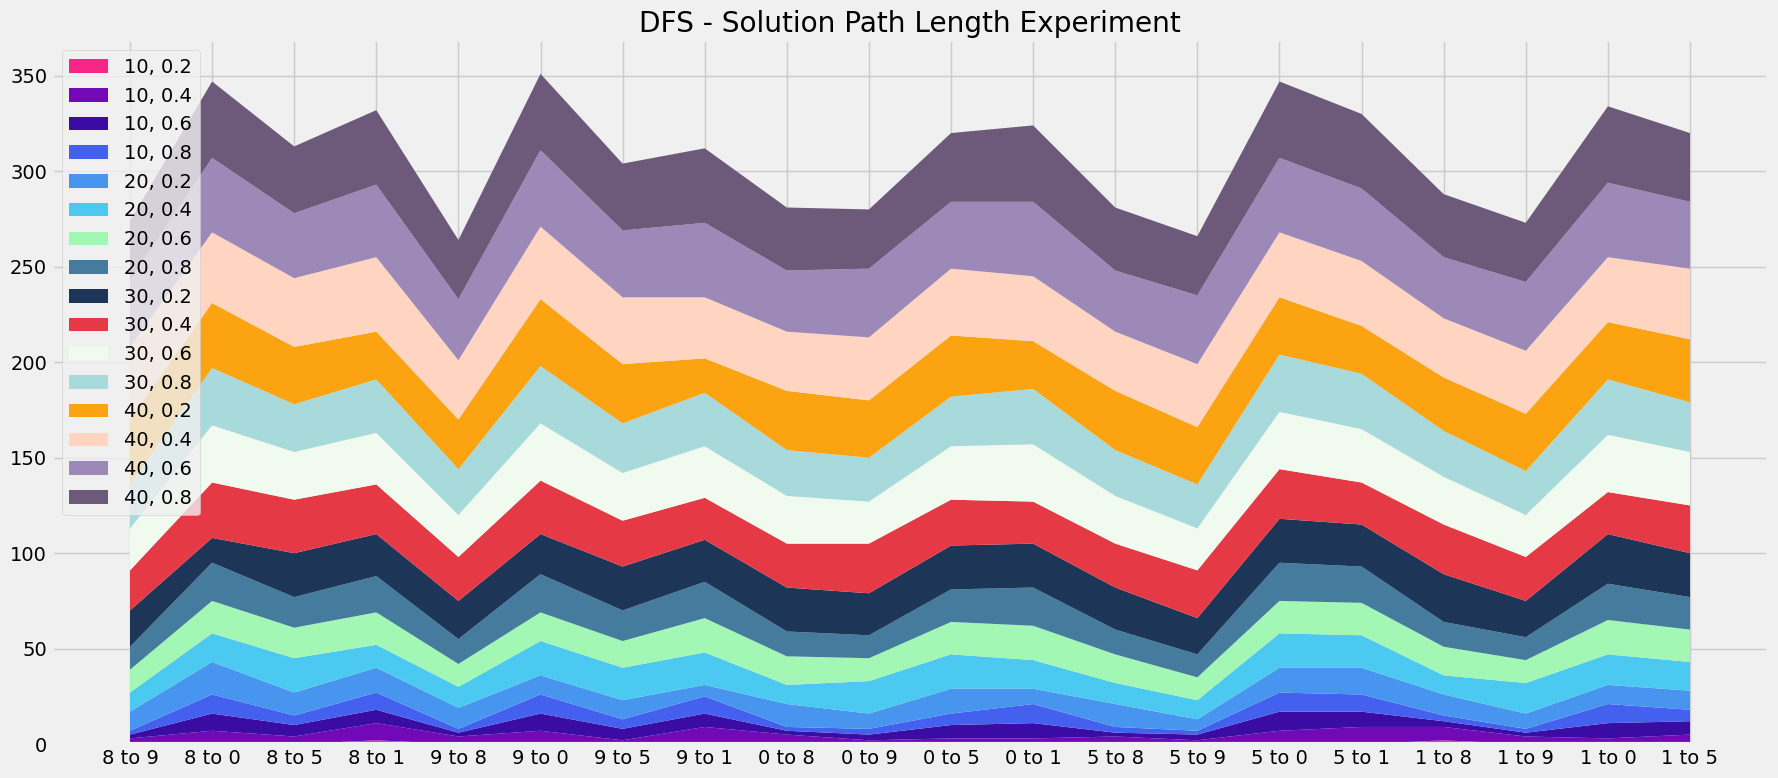

In [9]:
import matplotlib.pyplot as plt

# Define the plot titles for each subplot pair
plt.style.use('fivethirtyeight')

nodes = list(results['10, 0.2'].keys())
labels = []
path_length = []

for i, (label, result) in enumerate(results.items()):
    labels.append(label)
    path_length.append(list(len(path) if path else 0 for time, path in result.values()))

stack_plot("DFS - Solution Path Length Experiment", nodes, path_length, labels)